In [1]:
#data wrangling
import numpy as np
import pandas as pd
import datetime

#plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#ML libraries
#TODO: Sort out which ones we really need
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#other utilities
import os

In [2]:
data_dir = os.fsencode('./data/')

In [3]:
#read in he CSV files containing the data
#TODO: Abstract and build as function for util_pkg
df_dict = {}
for filename in os.listdir(data_dir):
    filepath_str = str(os.fsdecode(os.path.join(data_dir,filename)))
    df_name_str = str(os.fsdecode(os.path.splitext(filename)[0]))
    df_dict[df_name_str] = pd.read_csv(filepath_str, sep = '\t')
    print(df_name_str)
    

plays
players
courses
records
clears
likes
course-meta


In [4]:
#get an overview of the data we just pulled and drop unnecessary ones
for df in df_dict:
    print(df)
    print(df_dict[df].shape)
    display(df_dict[df].head())

plays
(3941378, 3)


,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,darter60k
1,2018-02-23 15:22:44.015,0000-0000-0353-3D35,davidchofis
2,2018-02-23 15:22:44.015,0000-0000-0353-3D35,fabioviana
3,2018-02-23 15:22:44.015,0000-0000-0353-3D35,gorigokky
4,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell


players
(884302, 4)


,id,image,flag,name
0,NolramImpro,http://mii-images.cdn.nintendo.net/3nhht3y6sjm...,BR,Nolram
1,SGK2017,http://mii-images.cdn.nintendo.net/4bxo1rny12r...,JP,しげ
2,preamstrikbiz0,http://mii-images.cdn.nintendo.net/2i0nphr806h...,US,primo
3,gotatari,http://mii-images.cdn.nintendo.net/2dvhs41zz7y...,JP,たくと
4,skrufpanda,http://mii-images.cdn.nintendo.net/2n2gr4n7oxg...,NO,pinkachuz


courses
(115032, 8)


,id,difficulty,gameStyle,maker,title,thumbnail,image,creation
0,079D-0000-0351-17E2,expert,marioBros3,NolramImpro,Apocalipse 14:12,https://dypqnhofrd2x2.cloudfront.net/079D-0000...,https://dypqnhofrd2x2.cloudfront.net/079D-0000...,2017-08-11 00:00:00
1,07CD-0000-030D-EA60,expert,marioBrosU,igorsssa,Dangerous Ship Fantasy,https://dypqnhofrd2x2.cloudfront.net/07CD-0000...,https://dypqnhofrd2x2.cloudfront.net/07CD-0000...,2017-03-11 00:00:00
2,07F7-0000-030F-A51B,superExpert,marioWorld,Wiggle133,Pow-Ing (Speedrun) (^o^),https://dypqnhofrd2x2.cloudfront.net/07F7-0000...,https://dypqnhofrd2x2.cloudfront.net/07F7-0000...,2017-03-14 00:00:00
3,080E-0000-0307-A394,expert,marioBros,vitorotavio,desafios radcore,https://dypqnhofrd2x2.cloudfront.net/080E-0000...,https://dypqnhofrd2x2.cloudfront.net/080E-0000...,2017-02-26 00:00:00
4,082F-0000-0358-A218,normal,marioBros3,CaptainToad4444,Goodbye Miiverse...,https://dypqnhofrd2x2.cloudfront.net/082F-0000...,https://dypqnhofrd2x2.cloudfront.net/082F-0000...,2017-08-29 00:00:00


records
(117126, 4)


,catch,id,player,timeRecord
0,2017-12-18 15:35:29.015,F68A-0000-0337-AF4F,The_Brucican,15482
1,2018-03-02 10:09:32.392,9669-0000-0330-554C,inoino2226,9265
2,2017-12-18 15:47:40.665,0D1D-0000-0355-DA7A,hbeeboy,6692
3,2018-02-23 15:02:20.557,18E3-0000-032A-27AB,Khazey,40383
4,2018-02-23 15:05:16.414,2C55-0000-0300-854A,okayan3378,1533


clears
(2051809, 3)


,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,darter60k
1,2018-02-23 15:22:44.015,0000-0000-0353-3D35,davidchofis
2,2018-02-23 15:22:44.015,0000-0000-0353-3D35,fabioviana
3,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell
4,2018-02-23 15:22:44.015,0000-0000-0353-3D35,igatake0229


likes
(618687, 3)


,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell
1,2018-03-02 09:46:27.847,0000-0000-035A-9F14,jlan6e
2,2017-12-18 14:47:47.489,0001-0000-0347-486A,cat38690
3,2017-12-18 14:47:47.489,0001-0000-0347-486A,raulcaba
4,2017-12-18 14:47:48.878,0001-0000-0359-B3CD,Tugaeddy


course-meta
(292298, 10)


,catch,id,firstClear,tag,stars,players,tweets,clears,attempts,clearRate
0,2017-11-16 14:45:36.703,079D-0000-0351-17E2,SGK2017,NaN,1,16,0,2,58,3.44
1,2017-11-16 14:45:38.342,07CD-0000-030D-EA60,emerson1312,NaN,1,22,0,2,120,1.66
2,2017-11-16 14:45:40.259,07F7-0000-030F-A51B,jacobrw420,NaN,9,69,0,7,903,0.77
3,2017-11-16 14:45:42.023,080E-0000-0307-A394,Alef_Nascimento,NaN,2,27,0,4,93,4.30
4,2017-11-16 14:45:43.414,082F-0000-0358-A218,Thunder8966,NaN,1,11,0,2,19,10.52


In [5]:
def check_null_cols(df_dict):
    #TODO: write a docstring
    
    for df in df_dict:
        print(df)
        display(pd.DataFrame((np.sum(df_dict[df].isnull())/df_dict[df].shape[0])))

check_null_cols(df_dict)

plays


,0
catch,0.0
id,0.0
player,0.0


players


,0
id,0.000000
image,0.000000
flag,0.000000
name,0.000011


courses


,0
id,0.000000
difficulty,0.000000
gameStyle,0.000000
maker,0.000661
title,0.000026
thumbnail,0.000000
image,0.000000
creation,0.000000


records


,0
catch,0.0
id,0.0
player,0.0
timeRecord,0.0


clears


,0
catch,0.0
id,0.0
player,0.0


likes


,0
catch,0.0
id,0.0
player,0.0


course-meta


,0
catch,0.000000
id,0.000000
firstClear,0.014119
tag,0.882394
stars,0.000000
players,0.000000
tweets,0.000000
clears,0.000000
attempts,0.000000
clearRate,0.000000


In [6]:
# drop tags from course-meta... too many nulls
# TODO: also drop entries from course and course meta with catch < max(catch)
# for the others just drop rows missing value

# to drop:
#  - all earlier entries of a course - we only want the most recent one
#      solution from : https://stackoverflow.com/a/51820845
#  - columns we won't need thereafter
#  - potentially remaining duplicates
course_meta_df = df_dict['course-meta'].\
                    sort_values(by = ['id', 'catch']).\
                    drop_duplicates(subset=['id'], keep = 'last').\
                    drop(columns = ['tag', 'catch']).\
                    dropna(subset = ['firstClear'], axis = 0).\
                    drop_duplicates()

course_df = df_dict['courses'].\
                drop(columns = ['thumbnail', 'image', 'title']).\
                dropna(subset = ['maker'], axis = 0).\
                drop_duplicates()

course_complete_df = course_meta_df.merge(course_df, on = 'id')

players_df = df_dict['players'].drop(columns = ['image', 'name']).\
                rename(columns= {'id' : 'player_id'}).\
                drop_duplicates()



In [7]:
# # group_test =\
# course_meta_df.loc[
#     course_meta_df.catch == course_meta_df.catch.max()].index

In [8]:
# df_dict['course-meta'].sort_values(['id', 'catch'])\
#         #.drop_duplicates(subset = ['id'], keep = 'last')

In [9]:
#get player flags
course_complete_df = course_complete_df.merge(players_df,
                                             how = 'left',
                                             left_on = 'maker',
                                             right_on = 'player_id')

print(course_complete_df.shape)
print(course_complete_df.columns)

(113122, 14)
Index(['id', 'firstClear', 'stars', 'players', 'tweets', 'clears', 'attempts',
       'clearRate', 'difficulty', 'gameStyle', 'maker', 'creation',
       'player_id', 'flag'],
      dtype='object')


In [10]:
course_complete_df.head()

,id,firstClear,stars,players,tweets,clears,attempts,clearRate,difficulty,gameStyle,maker,creation,player_id,flag
0,0000-0000-0353-3D35,groebenzell,1,13,0,9,27,33.33,normal,marioBrosU,Raphael160908,2017-08-16 00:00:00,Raphael160908,FR
1,0000-0000-035A-9F14,moonbear89,1,13,0,4,37,10.81,normal,marioWorld,Mr.loom,2017-09-03 00:00:00,Mr.loom,DE
2,0001-0000-0347-486A,cat38690,2,28,0,25,47,53.19,easy,marioBrosU,alirab,2017-07-19 00:00:00,alirab,CA
3,0001-0000-0359-B3CD,BHcrew4708,1,13,0,6,24,25.00,normal,marioBrosU,SmithsOnForchuk,2017-09-01 00:00:00,SmithsOnForchuk,CA
4,0002-0000-0328-E374,ishindenshin217,3,33,0,28,66,42.42,easy,marioBros,FOOTBALLEUR3.0,2017-04-30 00:00:00,FOOTBALLEUR3.0,FR


In [11]:
country_counts = course_complete_df.flag.value_counts()
difficulty_counts = course_complete_df.difficulty.value_counts() 

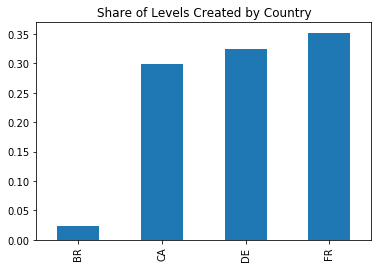

In [12]:
(country_counts/course_complete_df.shape[0]).sort_values().plot(kind = 'bar')
plt.title("Share of Levels Created by Country");

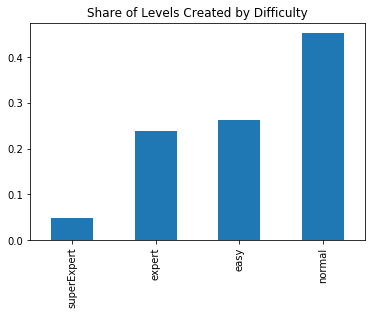

In [13]:
(difficulty_counts/course_complete_df.shape[0]).sort_values().plot(kind = 'bar')
plt.title("Share of Levels Created by Difficulty");

In [14]:
print(course_complete_df.creation.max(), course_complete_df.creation.min())

2018-04-09 11:03:11.789 2017-02-11 23:00:00


In [15]:
course_complete_df.flag.unique()

array(['FR', 'DE', 'CA', 'BR'], dtype=object)

In [16]:
players_df.flag.unique()

array(['BR', 'JP', 'US', 'NO', 'CA', 'FR', 'DE', 'HN', 'MX', 'BE', 'GB',
       'NL', 'DK', 'IT', 'SE', 'RU', 'FI', 'ES', 'GT', 'CL', 'PT', 'AT',
       'AU', 'PL', 'IE', 'PE', 'VE', 'NZ', 'CO', 'HR', 'SI', 'CH', 'DO',
       'BG', 'CR', 'PA', 'EC', 'GR', 'LU', 'PY', 'ZA', 'TR', 'HU', 'AR',
       'BO', 'SV', 'AI', 'RO', 'SK', 'EE', 'LC', 'UY', 'LT', 'VI', 'CZ',
       'CY', 'TT', 'NI', 'BB', 'GY', 'HT', 'MT', 'DM', 'LV', 'BM', 'AG',
       'BS', 'AW', 'BZ', 'GF', 'KY', 'MQ', 'AN', 'GD', 'GP', 'VG', 'VC',
       'JM', 'SR', 'MS', 'KN', 'TC'], dtype=object)

In [17]:
#extract number of courses created and add as extra column


course_complete_df.courses_by_maker = course_complete_df.groupby('maker').transform('count')

course_complete_df['creation'] = pd.to_datetime(course_complete_df.creation)

course_complete_df['normalized_age'] = (course_complete_df.creation - course_complete_df.creation.min()).dt.days

/home/kharuto/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [21]:
course_clean_df = course_complete_df.drop(columns = 
                ['firstClear', 'id', 'maker', 'player_id', 'clears', 'creation'])

# also drop clears... the info is not needed as we have 
# clears = attempts*(clearRate/100)

# we're dropping maker here although it might be useful...
# use somewhere else in analysis
# we should also extract creation in a meaningful way.

course_clean_df.head()

,stars,players,tweets,attempts,clearRate,difficulty,gameStyle,flag,normalized_age
0,1,13,0,27,33.33,normal,marioBrosU,FR,185
1,1,13,0,37,10.81,normal,marioWorld,DE,203
2,2,28,0,47,53.19,easy,marioBrosU,CA,157
3,1,13,0,24,25.00,normal,marioBrosU,CA,201
4,3,33,0,66,42.42,easy,marioBros,FR,77
